In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [4]:
cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours',
'red','green','blue','gold','white','black','orange','mainhue','circles',
'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data", names=cols)

In [5]:
var = ['red', 'green', 'blue','gold', 'white', 'black', 'orange', 'mainhue','bars','stripes', 
       'circles','crosses', 'saltires','quarters','sunstars','triangle','animate']

In [15]:
print(df.landmass.value_counts())
df_36 = df[df["landmass"].isin([3,6])]

landmass
4    52
5    39
3    35
1    31
6    20
2    17
Name: count, dtype: int64


In [16]:
df_36 = df[df["landmass"].isin([3,6])]
labels = df_36["landmass"]
print(df[var].dtypes)
data = pd.get_dummies(df_36[var])


red          int64
green        int64
blue         int64
gold         int64
white        int64
black        int64
orange       int64
mainhue     object
bars         int64
stripes      int64
circles      int64
crosses      int64
saltires     int64
quarters     int64
sunstars     int64
triangle     int64
animate      int64
dtype: object


In [17]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1, test_size=.4)

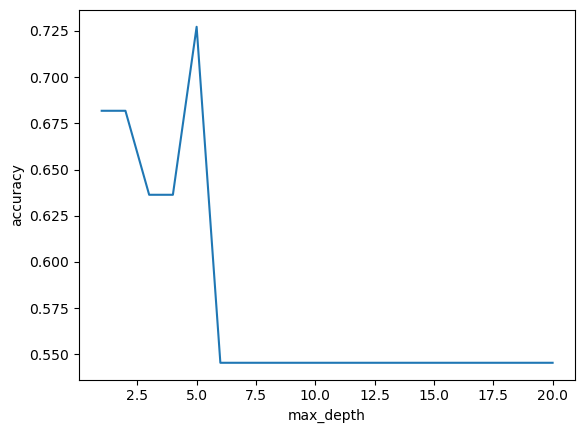

In [18]:
depths = range(1, 21)
acc_depth = []
for i in depths:
    dt = DecisionTreeClassifier(random_state=10, max_depth=i)
    dt.fit(train_data, train_labels)
    acc_depth.append(dt.score(test_data, test_labels))

plt.plot(depths, acc_depth)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

In [19]:
max_acc = np.max(acc_depth)
best_depth = depths[np.argmax(acc_depth)]
print(f'Highest accuracy {round(max_acc,3)*100}% at depth {best_depth}')

Highest accuracy 72.7% at depth 5


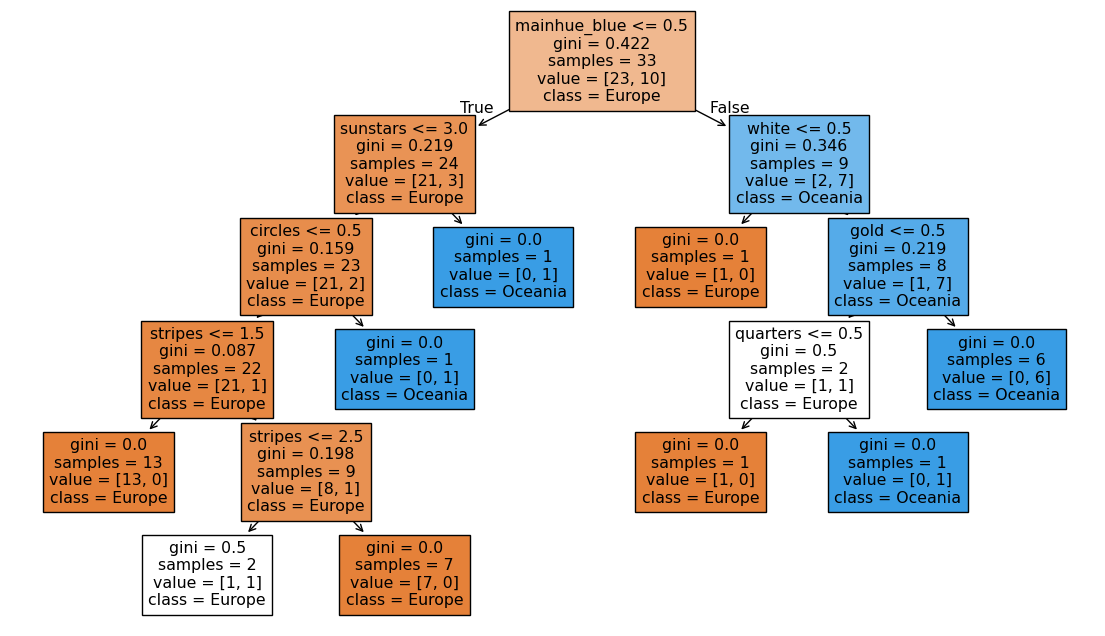

In [20]:
plt.figure(figsize=(14,8))
dt = DecisionTreeClassifier(random_state=1, max_depth=best_depth)
dt.fit(train_data, train_labels)
tree.plot_tree(dt, feature_names=train_data.columns,  
               class_names=['Europe', 'Oceania'],
               filled=True)
plt.show()

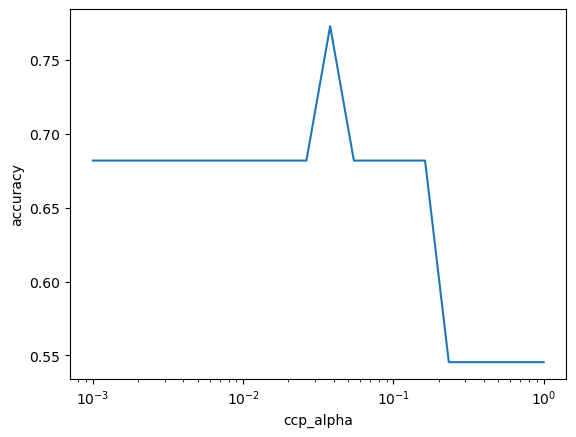

In [21]:
acc_pruned = []
ccp = np.logspace(-3, 0, num=20)
for i in ccp:
    dt_prune = DecisionTreeClassifier(random_state=1, max_depth=best_depth, ccp_alpha=i)
    dt_prune.fit(train_data, train_labels)
    acc_pruned.append(dt_prune.score(test_data, test_labels))

plt.plot(ccp, acc_pruned)
plt.xscale('log')
plt.xlabel('ccp_alpha')
plt.ylabel('accuracy')
plt.show()


In [22]:
max_acc_pruned = np.max(acc_pruned)
best_ccp = ccp[np.argmax(acc_pruned)]
print(f'Highest accuracy {round(max_acc_pruned,3)*100}% at ccp_alpha {round(best_ccp,4)}')

Highest accuracy 77.3% at ccp_alpha 0.0379


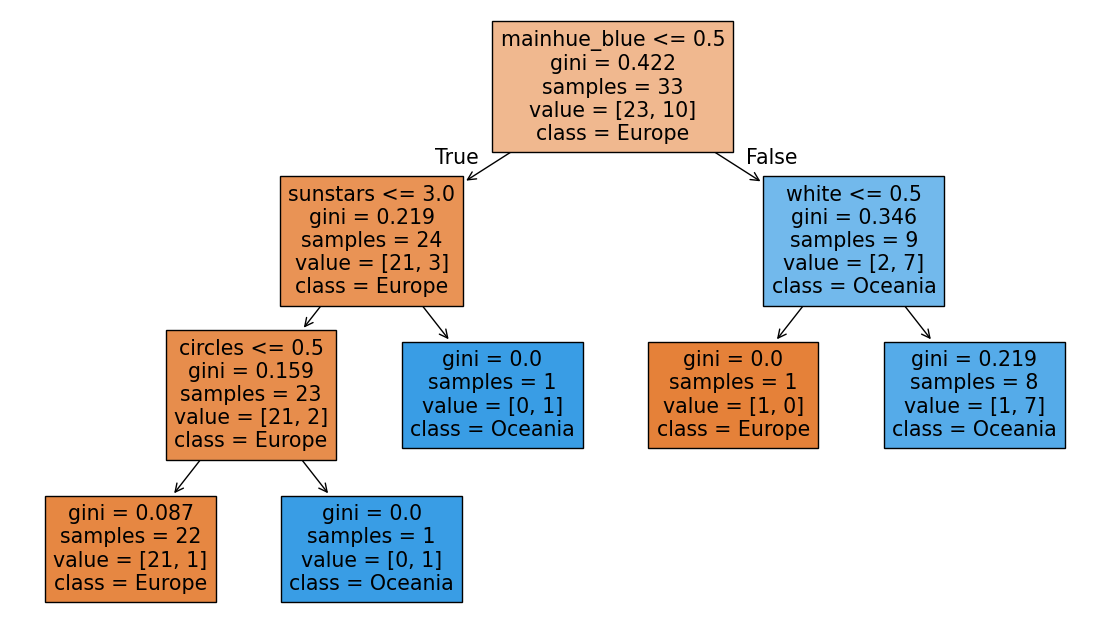

In [23]:
dt_final = DecisionTreeClassifier(random_state=1, max_depth=best_depth, ccp_alpha=best_ccp)
dt_final.fit(train_data, train_labels)

plt.figure(figsize=(14,8))
tree.plot_tree(dt_final, feature_names=train_data.columns,  
               class_names=['Europe', 'Oceania'],
               filled=True)
plt.show()
